# Halpha Catalog Paper

* made a copy of Halpha-catalog-paper because that used v1 tables
* this notebook will use the v2 tables

In [2]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from scipy.stats import median_absolute_deviation as MAD

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
homedir = os.getenv("HOME")
sys.path.append(os.path.join(homedir,'github/havirgo/python/'))
sys.path.append(os.path.join(homedir,'github/Virgo/programs/'))
import virgoCommon

Running on Rose's computer


In [4]:
print(homedir)

/home/rfinn


In [5]:
tabledir = os.path.join(homedir,'research/Virgo/tables-north/v2/')
print(tabledir)

/home/rfinn/research/Virgo/tables-north/v2/


In [6]:
plotdir = os.path.join(homedir,'research/Virgo/plots/halpha/')
print(plotdir)

/home/rfinn/research/Virgo/plots/halpha/


# If necessary, rebuild tables

If something changes with how we handle duplicates, or another run through the gui...



In [95]:
print(np.sum(v.ephot['RA_MOMENT'] > 0),len(v.ephot))

6653 6780


### Read in tables

In [7]:
%run ~/github/Virgo/programs/readtablesv2.py

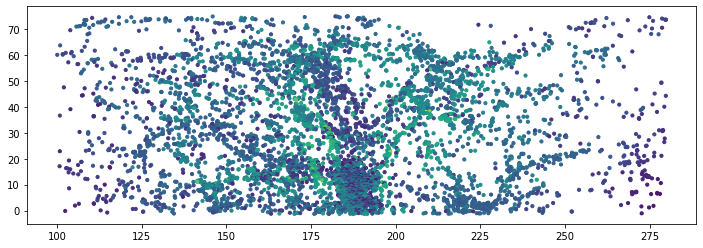

In [7]:
plt.figure(figsize=(12,4))
color = v.env['SGY']
plt.scatter(v.main['RA'],v.main['DEC'],s=10,c=color)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


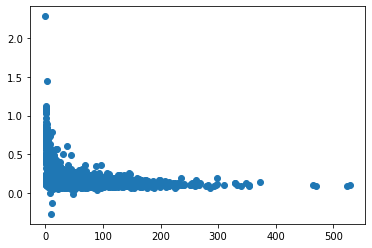

In [11]:
# ratio of SMA_SB25 and SB24

x = v.ephot['SMA_SB24']
y = v.ephot['SMA_SB25']
ratio = y/x
plt.scatter(x,np.log10(ratio))
#plt.ylim(0,10)

In [15]:
2.5/1.4


1.7857142857142858

# Sample Statistics

In [23]:
haflag = np.abs(v.halpha['HF_TOT']/v.halpha['HF_TOT_ERR']) > 5

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


(array([400.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([9.110e-16, 7.780e-02, 1.556e-01, 2.334e-01, 3.112e-01, 3.890e-01,
        4.668e-01, 5.446e-01, 6.224e-01, 7.002e-01, 7.780e-01],
       dtype=float32),
 <BarContainer object of 10 artists>)

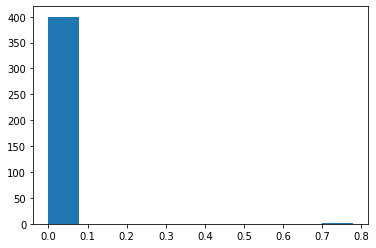

In [24]:
plt.figure()
detect_flag = v.halpha['HF_TOT'] > 0
plt.hist(v.halpha['HF_TOT'][detect_flag])

In [25]:
print(sum(v.halpha['HAobsflag'] & v.env['filament_member']))
print(sum(v.halpha['HAobsflag'] & v.env['filament_member'] & detect_flag))
print(sum(v.halpha['HAobsflag'] & v.env['cluster_member'] ))
print(sum(v.halpha['HAobsflag'] & v.env['cluster_member']  & detect_flag))

388
256
8
6


In [26]:
fields = ['filament_member','poor_group_memb','rich_group_memb','pure_field']

for f in fields:
    print()
    print(f)
    print('number observed: ',sum(v.halpha['HAobsflag'] & v.env[f]))
    print('number detected: ',sum(v.halpha['HAobsflag'] & v.env[f] & detect_flag))


filament_member
number observed:  388
number detected:  256

poor_group_memb
number observed:  133
number detected:  95

rich_group_memb
number observed:  331
number detected:  193

pure_field
number observed:  80
number detected:  44


In [27]:
fil_only = ~v.env['filament_member'] & v.env['rich_group_memb'] & detect_flag
print(np.sum(fil_only))

58


In [28]:
# environments
fil = v.env['filament_member'] & ~v.env['rich_group_memb'] & detect_flag
rg = ~v.env['filament_member'] & v.env['rich_group_memb'] & detect_flag
field = v.env['pure_field']  & detect_flag


In [29]:
fields=[fil,rg,field]
labels = ['field','rich group','pure field']
for i,f in enumerate(fields):
    print()
    print(labels[i])
    print('number observed: ',sum(v.halpha['HAobsflag'] & f))
    print('number detected: ',sum(v.halpha['HAobsflag'] & f & detect_flag))


field
number observed:  121
number detected:  121

rich group
number observed:  58
number detected:  58

pure field
number observed:  44
number detected:  44


# Image Quality 

* plot H - R FWHM vs R FWHM

/home/rfinn/github/havirgo/python/ha-paper1.py:50: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


H FWHM - R FWHM = 0.02 +/- 0.18


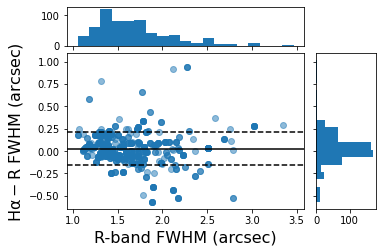

In [15]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_fwhm_r_h()

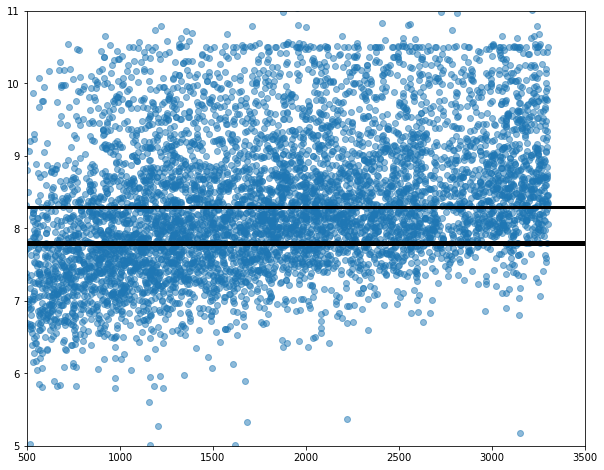

In [16]:
plt.figure(figsize=(10,8))
x = h.main['vr']
y = h.magphys['logMstar_med']
plt.scatter(x,y,alpha=.5)
plt.ylim(5,11)
plt.xlim(500,3500)
plt.axhline(y=8.3,c='k',lw=3)
plt.axhline(y=7.8,c='k',lw=5)

# Compare my R mag and NSA mag

In [17]:
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtablesv2.py

In [18]:
v.halpha

<Table length=6780>
  VFID    radius  prefix HAflag ... SMORPH_HS SMORPH_HFLAG HAobsflag VFID_V1 
 bytes8  float32 bytes36  bool  ...  float32      bool        bool    bytes8 
-------- ------- ------- ------ ... --------- ------------ --------- --------
VFID0000     0.0      --  False ...       0.0        False     False VFID0000
VFID0001     0.0      --  False ...       0.0        False     False VFID0001
VFID0002     0.0      --  False ...       0.0        False     False VFID0002
VFID0003     0.0      --  False ...       0.0        False     False VFID0003
VFID0004     0.0      --  False ...       0.0        False     False VFID0004
VFID0005     0.0      --  False ...       0.0        False     False VFID0005
VFID0006     0.0      --  False ...       0.0        False     False VFID0006
VFID0007     0.0      --  False ...       0.0        False     False VFID0007
VFID0008     0.0      --  False ...       0.0        False     False VFID0008
VFID0009     0.0      --  False ...       0.0        False     False VFID0009
     ...     ...     ...    ... ...       ...          ...       ...      ...
VFID6770     0.0      --  False ...       0.0        False     False VFID6787
VFID6771     0.0      --  False ...       0.0        False     False VFID6788
VFID6772     0.0      --  False ...       0.0        False     False VFID6789
VFID6773     0.0      --  False ...       0.0        False     False VFID6790
VFID6774     0.0      --  False ...       0.0        False     False VFID6791
VFID6775     0.0      --  False ...       0.0        False     False VFID6792
VFID6776     0.0      --  False ...       0.0        False     False VFID6793
VFID6777     0.0      --  False ...       0.0        False     False VFID6794
VFID6778     0.0      --  False ...       0.0        False     False VFID6795
VFID6779     0.0      --  False ...       0.0        False     False VFID6796

### Comparing our galfit mag and NSA r-band mag

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.



(-0.5, 1.0)

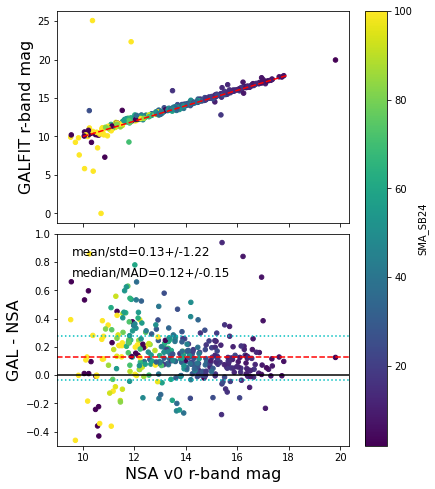

In [31]:
#plt.figure(figsize=(8,10))
plt.close("all")
fig,axs = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(6,8),squeeze=True)
allax = []
axfontsize=16

plt.subplots_adjust(hspace=.05)
# color by the SMA_SB24
color = v.ephot['SMA_SB24'][detect_flag]

# define magnitude
nsamag = 22.5 - 2.5*np.log10(v.nsav0['NMGY'][:,4])

axs[0].scatter(nsamag[detect_flag],v.halpha['GAL_MAG'][detect_flag],c=color,s=20,vmin=2,vmax=100)
xl = np.linspace(10,18,100)
axs[0].plot(xl,xl,'r--')

axs[0].set_ylabel('GALFIT r-band mag',fontsize=axfontsize)
#ax[0].set_xlabel('NSA v0 r-band mag',fontsize=20)

allax.append(plt.gca())
#axs[0].set_axis([])

#################################
# plot residuals
#################################

dy = v.halpha['GAL_MAG'][detect_flag] - nsamag[detect_flag]


sp = axs[1].scatter(nsamag[detect_flag],dy,c=color,s=20,vmin=2,vmax=100)

allax=[]
for a in axs:
    plt.sca(a)
    allax.append(plt.gca())

cb = plt.colorbar(sp,fraction=.08,ax=allax,label='SMA_SB24')

axs[1].axhline(y=0,ls='-',c='k')
axs[1].set_xlabel('NSA v0 r-band mag',fontsize=axfontsize)
axs[1].set_ylabel('GAL - NSA',fontsize=axfontsize)


###################################
# get std and mean offset
###################################
statflag = (dy < 99) & (dy > -99)
magmean = np.nanmean(dy[statflag])
magstd = np.nanstd(dy[statflag])
magmedian = np.nanmedian(dy[statflag])
magmad = MAD(dy[statflag])
plt.axhline(y=magmean,ls='--',c='r')
plt.axhline(y=magmean+magstd,ls=':',c='r')
plt.axhline(y=magmean-magstd,ls=':',c='r')

plt.axhline(y=magmedian+magmad,ls=':',c='c')
plt.axhline(y=magmedian-magmad,ls=':',c='c')
plt.text(0.05,0.9,f"mean/std={magmean:.2f}+/-{magstd:.2f}",fontsize=12,transform=plt.gca().transAxes,horizontalalignment='left')
plt.text(0.05,0.8,f"median/MAD={magmedian:.2f}+/-{magmad:.2f}",fontsize=12,transform=plt.gca().transAxes,horizontalalignment='left')
plt.ylim(-.5,1)



# Comparing our Mag24 with John's mag24

/home/rfinn/github/havirgo/python/ha-paper1.py:50: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/github/havirgo/python/ha-paper1.py:174: RuntimeWarning: divide by zero encountered in log10
  gr = 2.5*np.log10(self.ephot['FLUX_SB24_G']) - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:174: RuntimeWarning: invalid value encountered in log10
  gr = 2.5*np.log10(self.ephot['FLUX_SB24_G']) - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:174: RuntimeWarning: invalid value encountered in subtract
  gr = 2.5*np.log10(self.ephot['FLUX_SB24_G']) - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:178: RuntimeWarning:

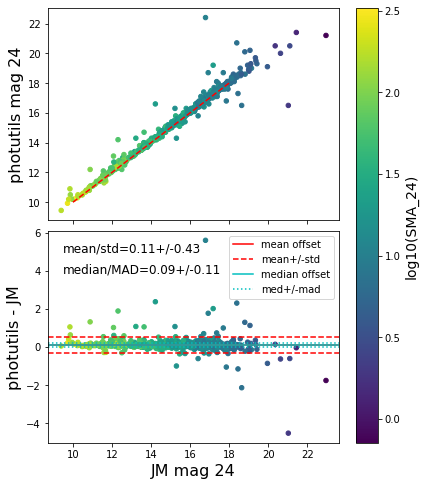

In [32]:
%run ~/github/havirgo/python/ha-paper1.py
h.compare_m24_ephot()

/home/rfinn/github/havirgo/python/ha-paper1.py:50: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/github/havirgo/python/ha-paper1.py:243: RuntimeWarning: divide by zero encountered in log10
  color = 22.5 - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:243: RuntimeWarning: invalid value encountered in log10
  color = 22.5 - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:263: RuntimeWarning: divide by zero encountered in true_divide
  dy = dy/jm_params[i][flag]


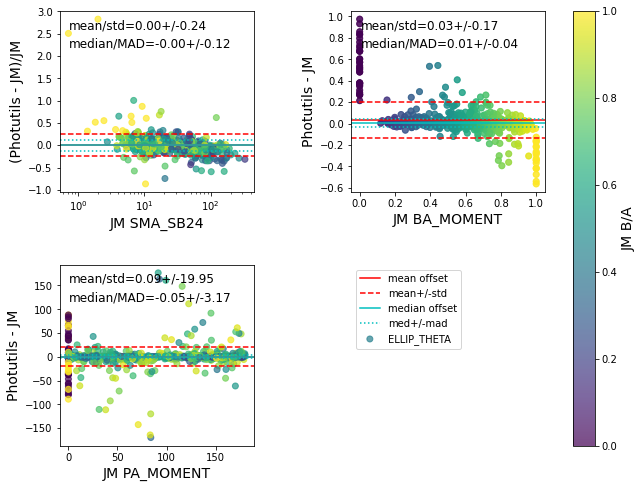

In [33]:
%run ~/github/havirgo/python/ha-paper1.py
h.compare_ephot_jm_geometry()

Want to inspect some of the outliers

* dmag > 1

* dBA < 0.5

In [212]:
# get names of galaxies with dmag > 1
sampleflag = h.rdetect_flag & (h.ephot['FLUX_SB24_R'] > 0)
flag = np.abs(h.mag_offset_jm) > 3
print("number of galaxies = ",np.sum(flag))
vfids = h.main['VFID'][sampleflag][flag]
for v in vfids:
    prefix =  h.main['prefix'][h.main['VFID'] == v][0]
    f = h.ephot['FLUX_SB24_R'][h.main['VFID'] == v][0]
    mag = 22.5-2.5*np.log10(f)
    photutil_mag = h.halpha['M24'][h.main['VFID'] == v][0]
    print(f"{prefix}: {f:.2f},{mag:.2f},{photutil_mag:.2f}")

number of galaxies =  7
VFID0625-GALEX2680919432329433855: 3.06,21.29,16.80
VFID2070-WISEAJ135318.84+401900.5: 550.29,15.65,11.10
VFID2217-WISEAJ112536.99+385316.5: 5.30,20.69,17.60
VFID2851-SDSSJ085226.54+304334.9: 3.86,21.03,16.50
VFID6163-WISEAJ145202.00+025842.9: 1.51,22.05,18.60
VFID6444-CGCG020-010: 8.01,20.24,15.10
VFID6528-PGC10053932NED063: 192.08,16.79,22.40


In [213]:
# get names of galaxies with dmag > 1
sampleflag = h.rdetect_flag & (h.ephot['FLUX_SB24_R'] > 0)
flag = (np.abs(h.mag_offset_jm) < 3) & (np.abs(h.mag_offset_jm) > 2)
print("number of galaxies = ",np.sum(flag))
vfids = h.main['VFID'][sampleflag][flag]
for v in vfids:
    prefix =  h.main['prefix'][h.main['VFID'] == v][0]
    f = h.ephot['FLUX_SB24_R'][h.main['VFID'] == v][0]
    mag = 22.5-2.5*np.log10(f)
    photutil_mag = h.halpha['M24'][h.main['VFID'] == v][0]
    print(f"{prefix}: {f:.2f},{mag:.2f},{photutil_mag:.2f}")

number of galaxies =  20
VFID0659-UGC09570: 118.61,17.31,15.20
VFID1471-WISEAJ111415.38+481934.0: 171.12,16.92,14.30
VFID1921-WISEAJ134434.71+421009.9: 45.53,18.35,15.70
VFID1962-SDSSJ134529.67+413831.0: 7.75,20.28,17.90
VFID2056-WISEAJ092313.64+402755.9: 24.56,19.02,16.50
VFID2090-SDSSJ092422.84+400527.3: 29.61,18.82,16.60
VFID2245-KUG1358+387: 107.50,17.42,15.00
VFID2997-WISEAJ103246.69+285513.2: 12.42,19.76,17.70
VFID3287-KUG0823+256: 24.96,19.01,16.70
VFID3349-IC2268: 139.66,17.14,15.10
VFID3451-NGC6276: 261.42,16.46,14.30
VFID3466-WISEAJ170033.15+225158.0: 4.82,20.79,18.10
VFID3481-WISEAJ082340.95+224310.7: 6.14,20.53,18.20
VFID6020-NGC5569: 2032.38,14.23,16.50
VFID6169-SDSSJ145022.84+025730.5: 18.72,19.32,16.50
VFID6225-SDSSJ150750.86+023721.4: 2.85,21.36,18.80
VFID6268-SDSSJ145059.85+022016.4: 7.73,20.28,18.20
VFID6323-WISEAJ150236.09+020139.0: 133.98,17.18,19.20
VFID6420-CGCG021-015: 88.69,17.63,15.40
VFID6478-WISEAJ150442.88+011727.3: 47.91,18.30,16.00


In [210]:

22.5 - 2.5*np.log10((h.ephot['FLUX_SB23.5_R'][h.main['VFID'] == 'VFID1532']))

<Column name='FLUX_SB23.5_R' dtype='float32' length=1>
10.394304

In [185]:
h.mag_offset_jm

AttributeError: 'haplots' object has no attribute 'mag_offset_jm'

# Size comparisons

Text(0, 0.5, 'Halpha R24')

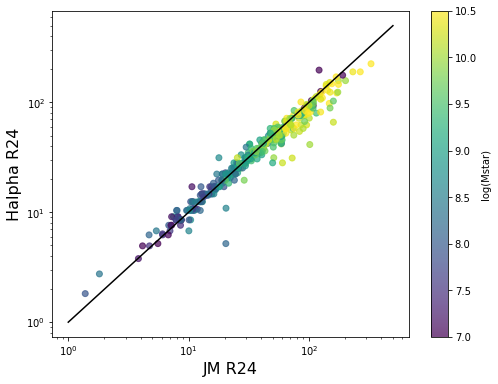

In [37]:
# my R24 vs JM's legacy 
plt.figure(figsize=(8,6))
x = v.ephot['SMA_SB24']
y = v.halpha['R24']
plt.scatter(x[haflag],y[haflag],c=v.magphys['logMstar_med'][haflag],alpha=.7,vmin=7,vmax=10.5)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
xline = np.linspace(1,500,500)
plt.plot(xline,xline,'k-')
plt.colorbar(label='log(Mstar)')
plt.xlabel("JM R24",fontsize=16)
plt.ylabel("Halpha R24",fontsize=16)

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/github/havirgo/python/ha-paper1.py:163: RuntimeWarning: divide by zero encountered in log10
  gr = 2.5*np.log10(self.ephot['FLUX_SB24_G']) - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:163: RuntimeWarning: invalid value encountered in log10
  gr = 2.5*np.log10(self.ephot['FLUX_SB24_G']) - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:163: RuntimeWarning: invalid value encountered in subtract
  gr = 2.5*np.log10(self.ephot['FLUX_SB24_G']) - 2.5*np.log10(self.ephot['FLUX_SB24_R'])
/home/rfinn/github/havirgo/python/ha-paper1.py:166: RuntimeWarning:

NameError: name 'MAD' is not defined

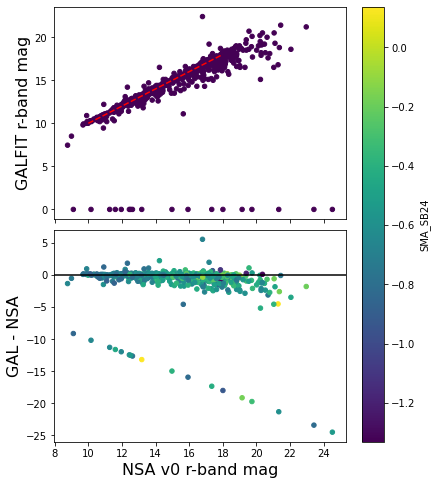

# Positions of Halpha Sources

In [11]:
def plot_spines():
    sfiles = glob.glob(homedir+'/research/Virgo/tables-north/spines/filament*.fits')
    ncolor = 0
    for i,f in enumerate(sfiles):
        spine  = Table.read(f)
        plt.plot(spine['ra'],spine['dec'],c=mycolors[ncolor],label=os.path.basename(f).replace('filament_spine_','').replace('.fits','').replace('_Filament',''),lw=3)
        ncolor += 1
        if ncolor > len(mycolors)-1:
            ncolor = 0

In [39]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(right=.8)
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='Virgo Filament Catalog')
# plot CO sources
flag = v.main['HAobsflag'] & ~v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bo',alpha=.5,label=r'$H\alpha$',markersize=8)

flag = v.main['COflag'] & ~v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bo',color='purple',markersize=8,alpha=.7,label=r'$CO, No \ H\alpha$',mec='0.5')
flag = v.main['COflag'] & v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=8,alpha=.7,label=r'$CO + H\alpha$',mec='0.5')

plt.legend(bbox_to_anchor=(1.01,1))
# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(loc='upper right')
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)
plt.savefig(plotdir+'/halpha_positions.png')
plt.savefig(plotdir+'/halpha_positions.pdf')

NameError: name 'glob' is not defined

<Figure size 864x432 with 0 Axes>

# Calculate the Fraction of Galaxies Observed in Each Filament

In [186]:
np.sum(v.paper1['COflag'])

242

In [163]:
# something is not right here - need to update
all_filaments = set(v.env['filament'])
#for f in virgoCommon.filaments: #these need to be renamed
for f in all_filaments:
    filmemb = (v.env['filament'] == f) & (v.env['filament_member'])
    nmemb = sum(filmemb)
    
    filmembco = filmemb & v.paper1['COflag']
    filmembcoha = filmembco & v.main['HAobsflag']
    nco = sum(filmembco)
    ncoha = sum(filmembcoha)
    frac_co_with_ha = ncoha/nco
    
    filmembha = filmemb & v.main['HAobsflag']
    nha = sum(filmembha)
    frac_filmemb_with_ha = nha/nmemb
    
    
    print('######### {}  ##########'.format(f))
    print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
    print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
    print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
    print("")
    

    

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


######### Canes_Venatici  ##########
Number of members=96, CO=0, Halpha=8
Percent of members with Halpha = 8.3 (8/96)
Percent of CO members with Halpha = nan (0/0)

######### NGC5353_4  ##########
Number of members=133, CO=18, Halpha=40
Percent of members with Halpha = 30.1 (40/133)
Percent of CO members with Halpha = 100.0 (18/18)

######### Leo_Minor_B  ##########
Number of members=39, CO=11, Halpha=17
Percent of members with Halpha = 43.6 (17/39)
Percent of CO members with Halpha = 100.0 (11/11)

######### VirgoIII  ##########
Number of members=206, CO=36, Halpha=123
Percent of members with Halpha = 59.7 (123/206)
Percent of CO members with Halpha = 100.0 (36/36)

######### Draco  ##########
Number of members=48, CO=9, Halpha=16
Percent of members with Halpha = 33.3 (16/48)
Percent of CO members with Halpha = 100.0 (9/9)

######### LeoII_A  ##########
Number of members=145, CO=16, Halpha=46
Percent of members with Halpha = 31.7 (46/145)
Percent of CO members with Halpha = 100.0 (16/

In [211]:
filmemb = (~v.env['filament_member'])
nmemb = sum(filmemb)
    
filmembco = filmemb & v.paper1['COflag']
filmembcoha = filmembco & v.main['HAobsflag']
nco = sum(filmembco)
ncoha = sum(filmembcoha)
frac_co_with_ha = ncoha/nco
    
filmembha = filmemb & v.main['HAobsflag']
nha = sum(filmembha)
frac_filmemb_with_ha = nha/nmemb
    
    
print('######### NON FILAMENT GALAXIES  ##########'.format(f))
print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
print("")

######### NON FILAMENT GALAXIES  ##########
Number of members=4662, CO=93, Halpha=264
Percent of members with Halpha = 5.7 (264/4662)
Percent of CO members with Halpha = 100.0 (93/93)



In [97]:
print("number of galaxies observed w/Halpha = ",sum( v.main['HAobsflag']))
print("number of CO and halpha = ",sum(v.main['COflag'] & v.main['HAobsflag']))
print("number of filament members w/CO + Halpha = ",sum(v.main['COflag'] & v.env['filament_member'] & v.main['HAobsflag']))
print("number of non filament members w/CO + Halpha = ",sum(v.main['COflag'] & ~v.env['filament_member'] & v.main['HAobsflag']))
print("number of filament members w/Halpha = ",sum(v.env['filament_member'] & v.main['HAobsflag']))

number of galaxies observed w/Halpha =  689
number of CO and halpha =  241
number of filament members w/CO + Halpha =  148
number of non filament members w/CO + Halpha =  93
number of filament members w/Halpha =  425


# Halpha Targets in z0MGS

In [92]:
print(sum(v.main['HAobsflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] &v.main['COflag'] ))
print(sum(v.main['HAobsflag']  &v.main['COflag'] ))

689
347
235
241


# QC on GALFIT geometry parameters

* compare galfit parameters with NSA Sersic fits
* results look pretty good

In [84]:
%run ~/github/havirgo/python/ha-paper1.py

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


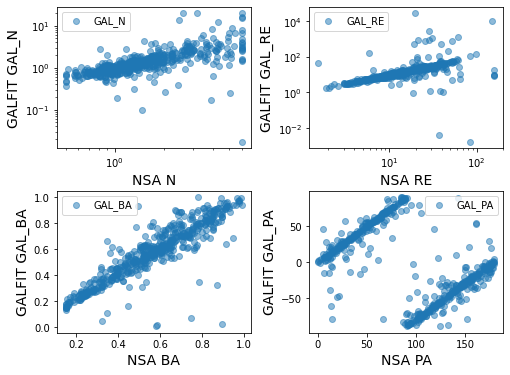

In [85]:
h.plot_qc_galfit()

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


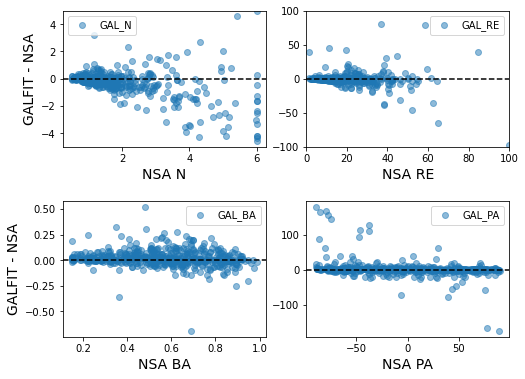

In [109]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_qc_galfit_residuals()

# Morphologies

* Quality checks with R-band
  * compare Gini, M20, C30, Asymmetry

* Once that is ok, what can we learn from Halpha values?

## Compare phot and statmorph

* GINI
* M20
* C
* A


/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/github/havirgo/python/ha-paper1.py:258: RuntimeWarning: divide by zero encountered in log10
  c = self.magphys['logsSFR']
/home/rfinn/github/havirgo/python/ha-paper1.py:258: RuntimeWarning: invalid value encountered in log10
  c = self.magphys['logsSFR']


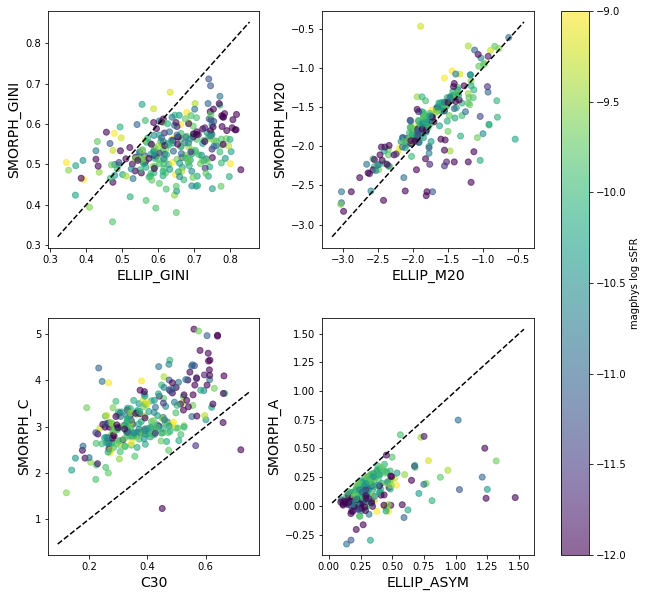

In [32]:
%run ~/github/havirgo/python/ha-paper1.py

h.plot_qc_qmorph_smorph_r()

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Number with good statmorph flag =  187


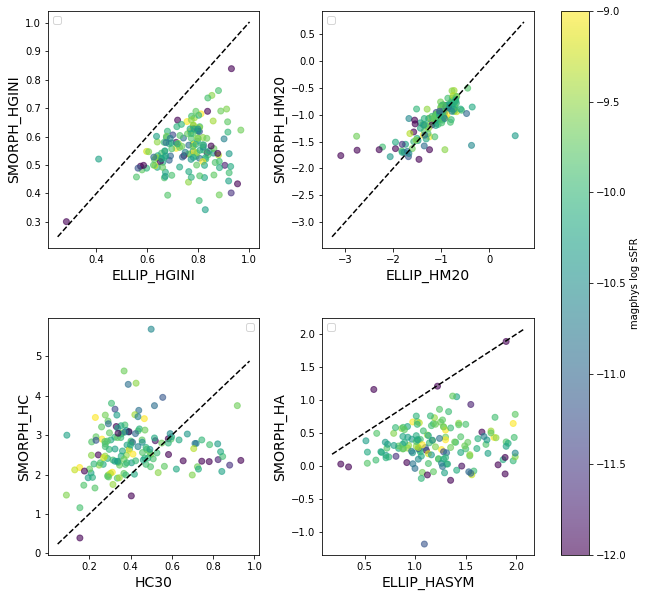

In [33]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_qc_qmorph_smorph_ha()

In [16]:
%run ~/github/havirgo/python/ha-paper1.py

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


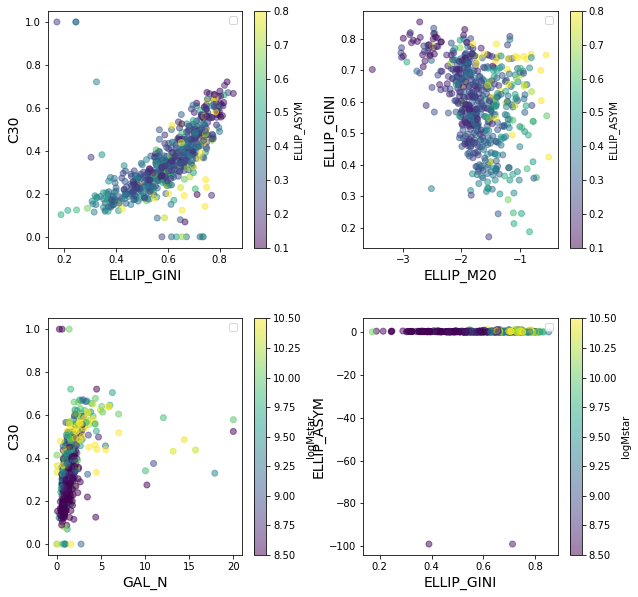

In [34]:
h.plot_qc_qmorph()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


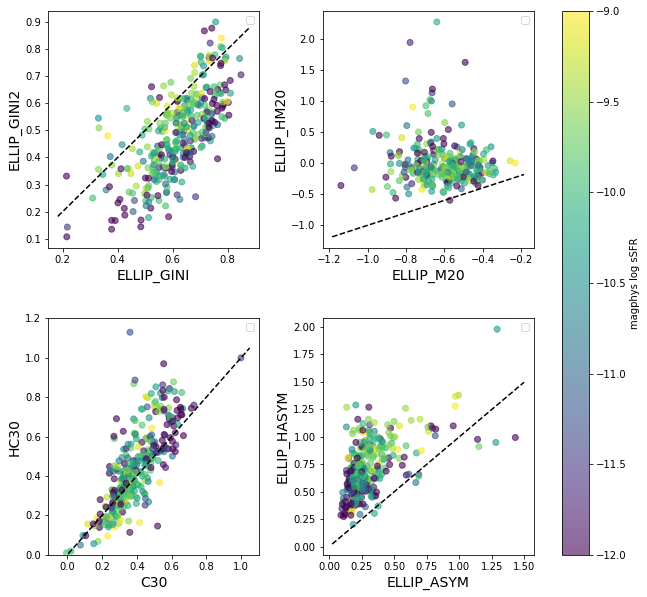

In [177]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_qc_qmorph_ha_r()

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


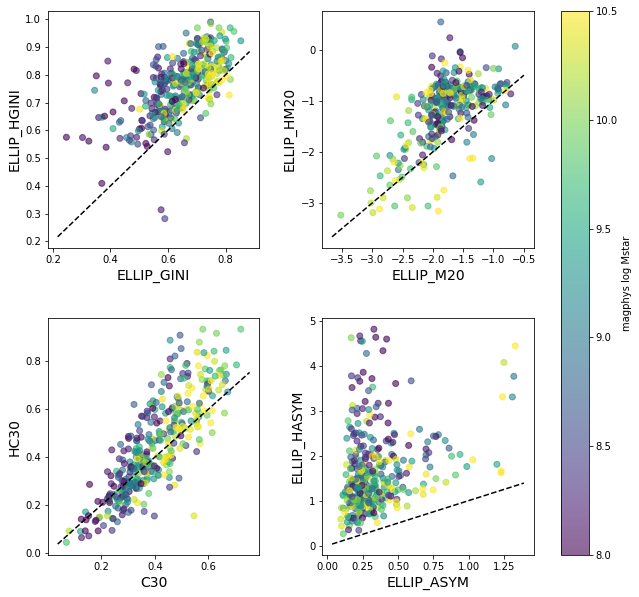

In [43]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_qc_qmorph_ha_r()

In [56]:
%run ~/github/havirgo/python/ha-paper1.py
h.get_asym_gals()

VFIDs for gals with high Halpha asym and regular r-band asym
  VFID  
--------
VFID0448
VFID0731
VFID0787
VFID1174
VFID1297
VFID1793
VFID1939
VFID2096
VFID2257
VFID2463
VFID2486
VFID2673
VFID2691
VFID2881
VFID2919
VFID3009
VFID3024
VFID3041
VFID3508
VFID3600
VFID3607
VFID5177


/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


In [57]:
%run ~/github/havirgo/python/ha-paper1.py
h.get_asym_gals()

VFIDs for gals with high Halpha asym and regular r-band asym
  VFID  
--------
VFID1934
VFID6394


/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


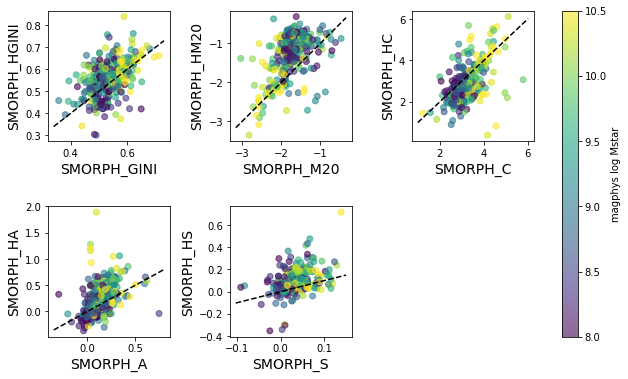

In [63]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_smorph_ha_r()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/github/havirgo/python/ha-paper1.py:215: RuntimeWarning: invalid value encountered in log10
  


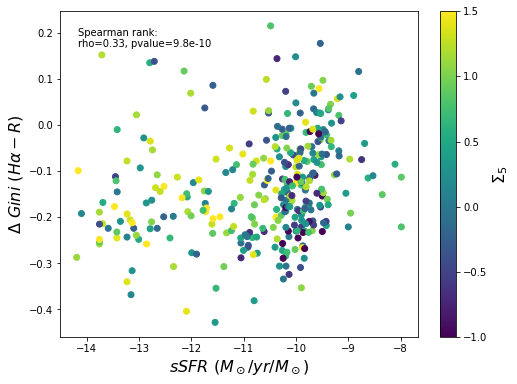

In [182]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_gini_ssfr()

In [64]:
h.co.colnames

['VFID',
 'RAgas',
 'DECgas',
 'COreference',
 'alphaCO',
 'Mmol',
 'Mmol_err_up',
 'Mmol_err_down',
 'r21',
 'err_r21',
 'tdep',
 'tdep_err_up',
 'tdep_err_down',
 'HIreference',
 'MHI',
 'MHI_err_up',
 'MHI_err_down',
 'MH2_to_MHI',
 'MH2_to_MHI_err_up',
 'MH2_to_MHI_err_down',
 'H2def',
 'errH2def',
 'HIdef',
 'errHIdef',
 'Separation']

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3
/home/rfinn/github/havirgo/python/ha-paper1.py:418: RuntimeWarning: invalid value encountered in log10
  x = np.log10(self.env['n5th_2D'])


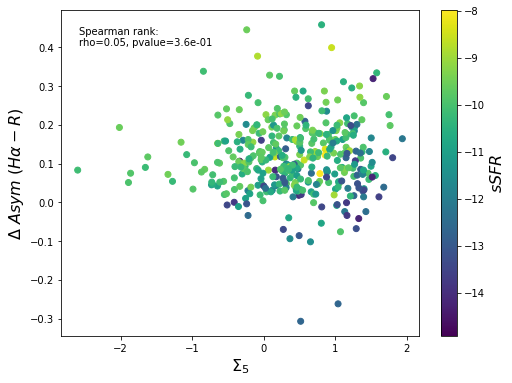

In [68]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_asym_sigma5()

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


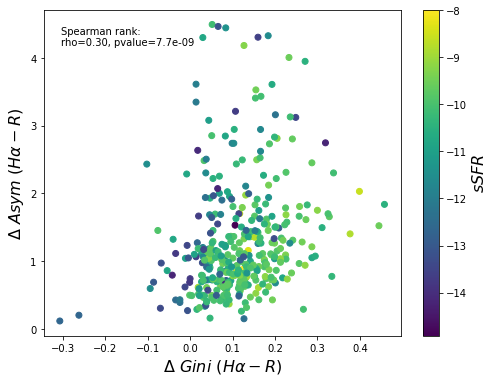

In [69]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_asym_gini()

/home/rfinn/github/havirgo/python/ha-paper1.py:44: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


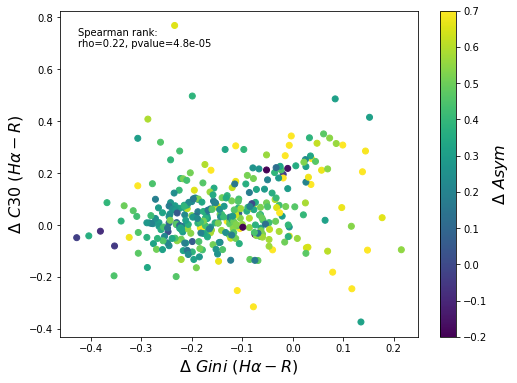

In [184]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_c30_gini()

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


  VFID  
--------
VFID0377
VFID0473
VFID0481
VFID0483
VFID0520
VFID0601
VFID0606
VFID0680
VFID0719
VFID0775
     ...
VFID6352
VFID6362
VFID6380
VFID6389
VFID6411
VFID6422
VFID6429
VFID6477
VFID6486
VFID6582
VFID6603
Length = 147 rows


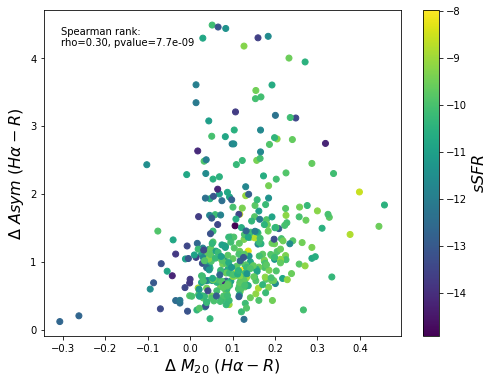

In [84]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_asym_m20(usephot=True,printids=True,asymcut=1,asymmax=2)

/home/rfinn/github/havirgo/python/ha-paper1.py:48: RuntimeWarning: invalid value encountered in true_divide
  snr_flag = np.abs(self.halpha['HF_TOT']/self.halpha['HF_TOT_ERR']) > 3


  VFID  
--------
VFID0481
VFID0606
VFID1009
VFID1830
VFID2057
VFID2138
VFID4177
VFID4254
VFID5678
VFID5686
VFID5960
VFID6175
VFID6236
VFID6476
VFID6582


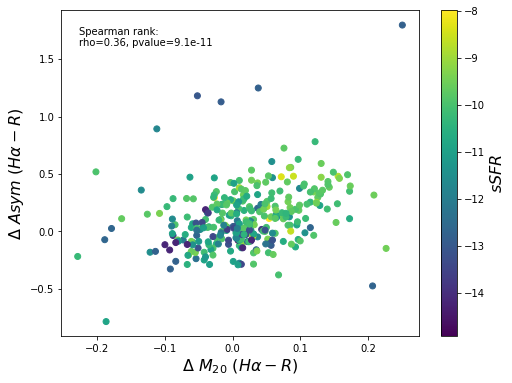

In [83]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_asym_m20(usephot=False,printids=True,asymmax=2)

In [78]:
# this is a case of clear RPS, but statmorph doesn't model it successfully
# bummer ! 
# but delta Asym in 
h.halpha['SMORPH_XCENTROID'][h.main['VFID'] == 'VFID5683']

<Column name='SMORPH_XCENTROID' dtype='float32' length=1>
0.0

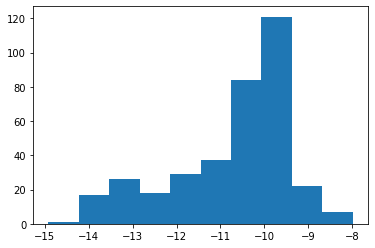

In [159]:
plt.figure()
t = plt.hist(h.magphys['logsSFR'][h.sampleflag])

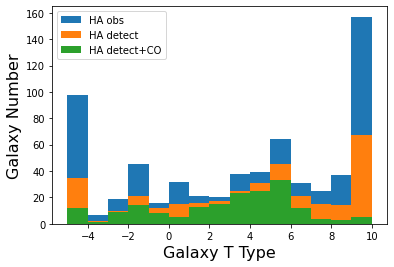

In [35]:
# sample statistics for T type
plt.figure()

x = v.hl['t']

# plot histogram of T type, with and without z0mgs
mybins = np.arange(-5,11)
flag1 = v.haobs['HaObsFlag'] #& ~v.main['COflag'] & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA obs')
flag1 = v.haobs['HaObsFlag']  & (v.halpha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA detect')
flag1 = v.haobs['HaObsFlag'] & v.main['COflag'] & haflag
t = plt.hist(x[flag1],bins=mybins,label='HA detect+CO')
plt.xlabel('Galaxy T Type',fontsize=16)
plt.ylabel('Galaxy Number',fontsize=16)
plt.legend()

# Environment

* establish environmental classifications
* delta asym vs environment
* delta gini vs environment
* 

# Sizes

# Compare SFR z0MGS with our SFR

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ks" (-> marker='s'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


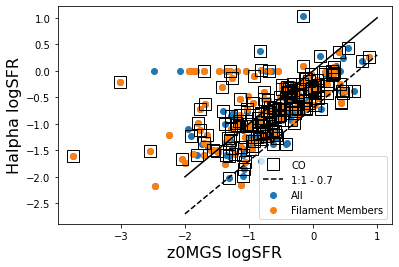

In [155]:
flag = (v.halpha['HF_R24'] > 0) & (v.z0mgs['logmass'] > 0) & haflag
x = v.z0mgs['logsfr']
y = v.halpha['LOG_SFR_HA']
#flag = v.main['HAobsflag']
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
xline = np.linspace(-2,1,100)
plt.plot(xline,xline,'k-')
plt.plot(xline,xline-.7,'k--',label='1:1 - 0.7')
plt.xlabel('z0MGS logSFR',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plt.legend()


In [98]:
flag = (v.halpha['HF_R24'] > 0) & haflag
x = v.magphys['logSFR']
y = v.halpha['LOG_SFR_HA']
#flag = v.main['HAobsflag']
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
xline = np.linspace(-3,1,100)
plt.plot(xline,xline,'k-')
plt.plot(xline,xline-.3,'k--',label='1:1 - 0.3')
plt.xlabel('magphys logSFR',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plt.legend()
plt.axis([-5,1,-4,1])

NameError: name 'haflag' is not defined

In [32]:
def get_BV_MS(logMstar):
    ''' get MS fit that BV calculated from GSWLC '''
    return 0.53*logMstar-5.5

def plot_BV_MS(ax,color='mediumblue',ls='-'):
    plt.sca(ax)
    
    x1,x2 = 8.,11.15
    xline = np.linspace(x1,x2,100)
    yline = get_BV_MS(xline)
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c=color,ls=ls,lw=3,label='Linear Fit GSWLC')

    # scatter around MS fit
    sigma=0.3
    ax.plot(xline,yline-1.5*sigma,c='w',ls='--',lw=4)
    ax.plot(xline,yline-1.5*sigma,c=color,ls='--',lw=3,label='fit-1.5$\sigma$')

def plot_GSWLC_sssfr(ax=None,ls='-'):
    if ax is None:
        ax = plt.gca()

    ssfr = -11.5
    x1,x2 = 9.6,11.15
    xline = np.linspace(x1,x2,100)
    yline = ssfr+xline
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c='0.5',ls=ls,lw=3,label='log(sSFR)=-11.5')
    

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


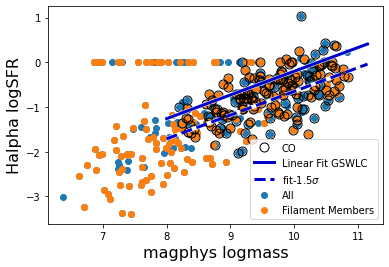

In [33]:
# SF MS
x = v.magphys['logMstar']
y = v.halpha['LOG_SFR_HA']
flag = v.halpha['HAobsflag'] & haflag #(v.ha['GAL_HF_TOT'] > 0)
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.env['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ko',marker='o',mfc='None',markersize=9,label='CO')
#xline = np.linspace(8,11,100)
#plt.plot(xline,xline,'k-')
#plt.plot(xline,xline-.5,'k--',label='1:1 - 0.5')
plt.xlabel('magphys logmass',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plot_BV_MS(plt.gca())
plt.legend()




# SFR vs Stellar Mass for all Galaxies vs Halpha Sample



/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


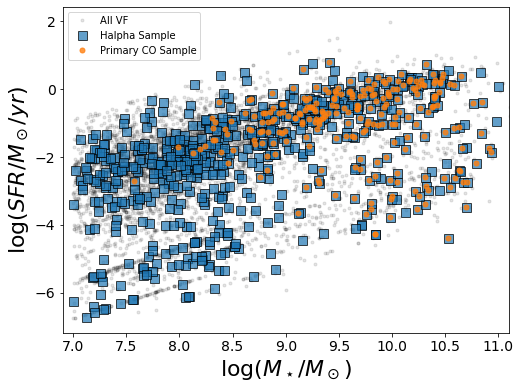

In [36]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.main['HAobsflag'] & ~v.main['COflag']# valid magphys fit
flag2 = flag1 & v.main['HAobsflag']
flag3 = flag1 & v.main['COflag']
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag2],y[flag2],'bs',c=mycolors[0],mec='k',alpha=.7,label='Halpha Sample',markersize=9)
plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)
plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)
plt.savefig(plotdir+'sfr-mstar-halpha.png')
plt.savefig(plotdir+'sfr-mstar-halpha.pdf')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bv" (-> color='b'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()


(6.9, 11.1)

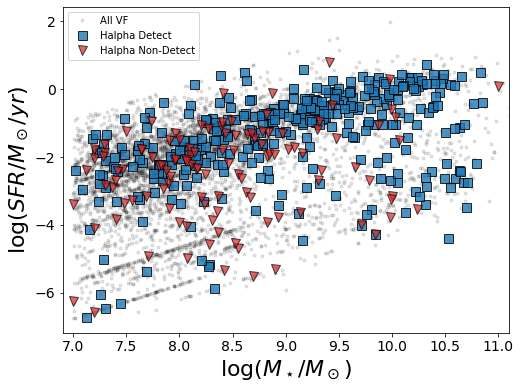

In [37]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.halpha['HAflag'] & ~v.main['COflag']# valid magphys fit
flag2 = flag1 & v.halpha['HAflag'] & ~haflag
flag3 = flag1 & v.main['COflag']
flag4 = flag1 & haflag
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag4],y[flag4],'bs',c=mycolors[0],mec='k',alpha=.8,label='Halpha Detect',markersize=9)
plt.plot(x[flag2],y[flag2],'bv',c=mycolors[3],mec='k',alpha=.7,label='Halpha Non-Detect',markersize=9)
#plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)

plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bv" (-> color='b'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  if sys.path[0] 

(6.9, 11.1)

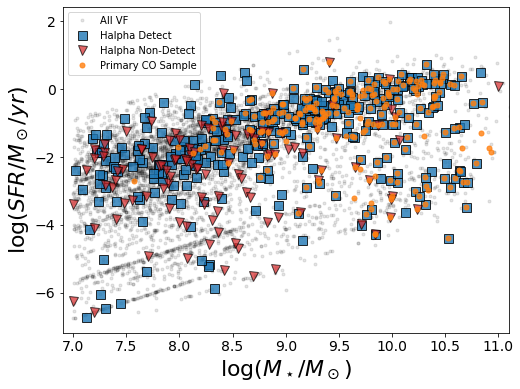

In [38]:
x = v.magphys['logMstar']
y = v.magphys['logSFR']
flag1 = (x > 7)
flag1b = flag1 &  ~v.halpha['HAflag'] & ~v.main['COflag']# valid magphys fit
flag2 = flag1 & v.halpha['HAflag'] & ~haflag
flag3 = flag1 & v.paper1['COflag']
flag4 = flag1 & haflag
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag4],y[flag4],'bs',c=mycolors[0],mec='k',alpha=.8,label='Halpha Detect',markersize=9)
plt.plot(x[flag2],y[flag2],'bv',c=mycolors[3],mec='k',alpha=.7,label='Halpha Non-Detect',markersize=9)
plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)

plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)


# Size of SF Disk vs Stellar Disk

* First some QC to check on our size measurements
* there are a number of r-band size measurements in the halpha catalog
We have

Text(0, 0.5, 'Halpha radius')

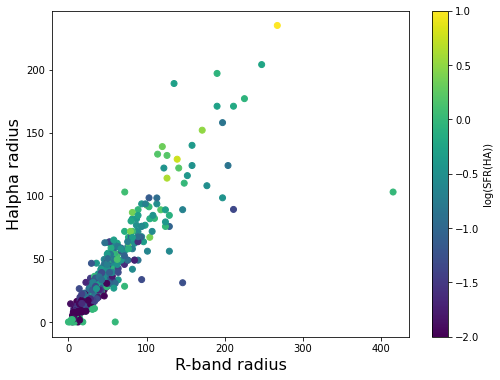

In [47]:
plt.figure(figsize=(8,6))
radr='GAL_PETRO_R90'
radh = 'GAL_HPETRO_R90'

radr='R24'
radh = 'HR17'
x = v.halpha[radr]

y = v.halpha[radh]
c = v.env['n5th_2D']
c = v.halpha['LOG_SFR_HA']
plt.scatter(x[haflag],y[haflag],c=c[haflag],vmin=-2,vmax=1.)
plt.colorbar(label='log(SFR(HA))')
plt.xlabel('R-band radius',fontsize=16)
plt.ylabel('Halpha radius',fontsize=16)

In [50]:
import seaborn as sns

In [51]:
import pandas

In [48]:
%run ~/github/havirgo/python/ha-paper1.py

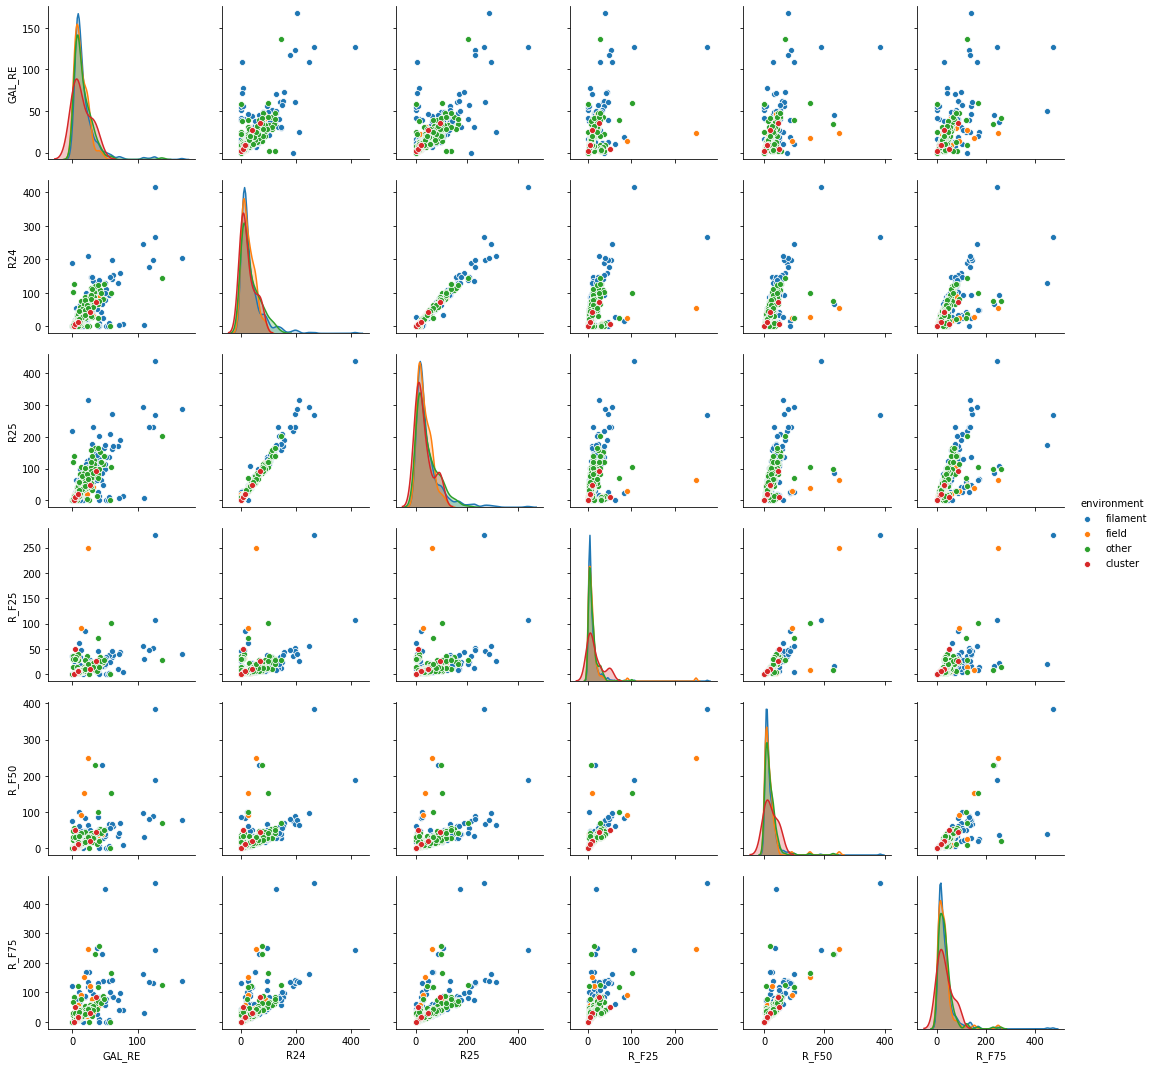

In [49]:
#tab = Table(h.halpha['HR16','HR17','HR_F25','HR_F50','HR_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])

tab = Table(h.halpha['GAL_RE','R24','R25','R_F25','R_F50','R_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])
tab.add_column(h.environment,name='environment')
df = pdf(data=np.array(tab))
flag = h.main['HAobsflag'] & (h.halpha['GAL_RE'] < 200)
sns.pairplot(df[flag],hue="environment")

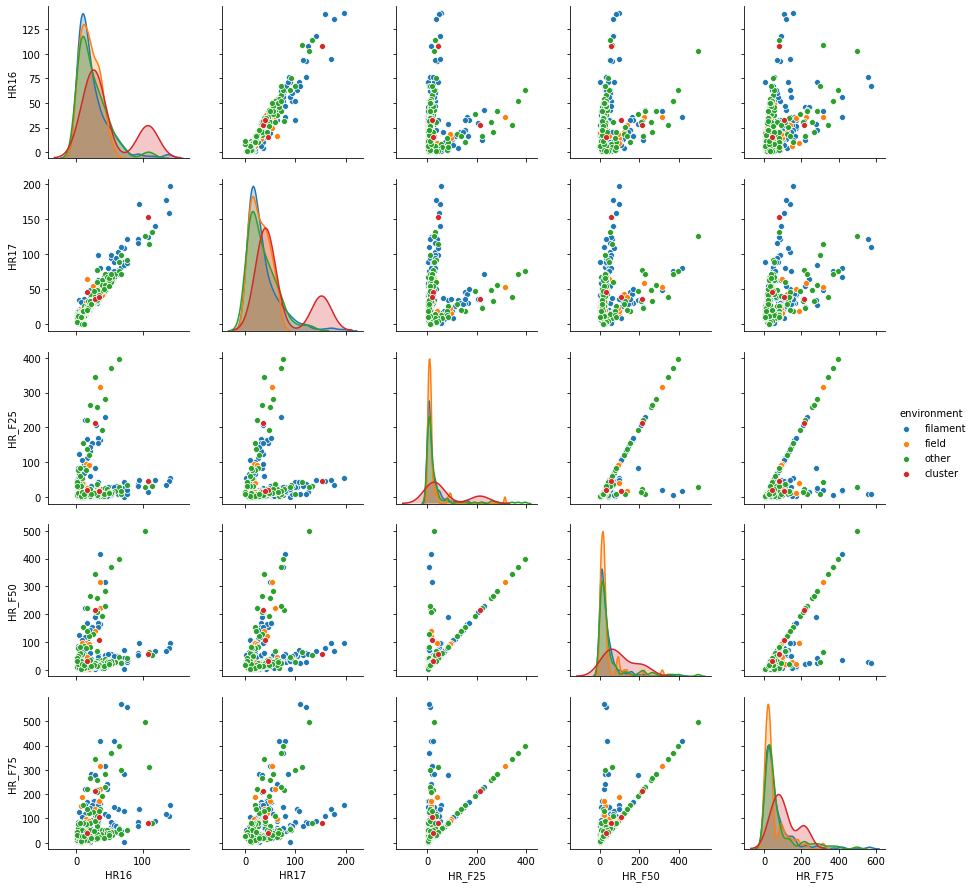

In [52]:
tab = Table(h.halpha['HR16','HR17','HR_F25','HR_F50','HR_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])

#tab = Table(h.halpha['R24','R25','R_F25','R_F50','R_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])
tab.add_column(h.environment,name='environment')
df = pdf(data=np.array(tab))
sns.pairplot(df[h.sampleflag],hue="environment")

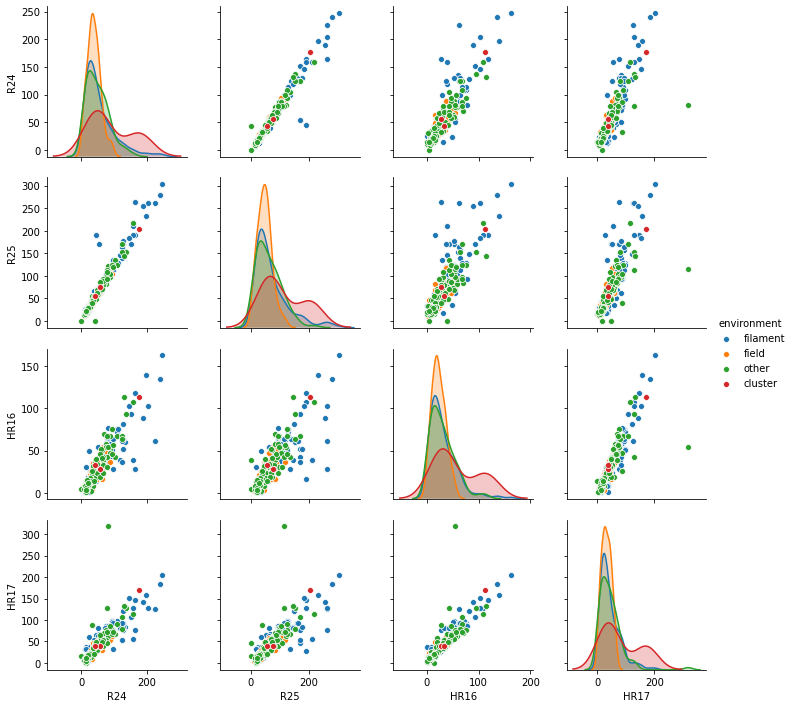

In [242]:
tab = Table(h.halpha['R24','R25','HR16','HR17'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])

#tab = Table(h.halpha['R24','R25','R_F25','R_F50','R_F75'])#'HPETRO_R','HPETRO_R50','HPETRO_R90'])
tab.add_column(h.environment,name='environment')
df = pdf(data=np.array(tab))
sns.pairplot(df[h.sampleflag],hue="environment")#, diag_kind="hist")

In [53]:
enames = set(h.environment)
ntot = 0
for e in enames:
    print(e,np.sum(np.array(h.environment)[h.sampleflag] == e))
    ntot += np.sum(np.array(h.environment)[h.sampleflag] == e)
print("ntot = ",ntot)

cluster 4
other 110
filament 252
field 54
ntot =  420


Text(0.5, 0, 'Size Ratio')

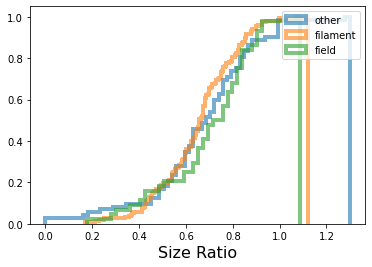

In [54]:
sizeratio = h.halpha['HR17']/h.halpha['R25']
flag1 = h.sampleflag & (h.halpha['R25'] > 0) & (h.hl['t'] > 1)
sizeratio = sizeratio[flag1]

envcat = np.array(h.environment)[flag1]
plt.figure()

for e in enames:
    if e == 'cluster':
        continue
    flag =  (np.array(envcat) == e) 
    plt.hist((sizeratio[flag]),cumulative=True,density=True,label=e,alpha=.6,histtype='step',lw=4,bins=np.sum(flag))
plt.legend()
plt.xlabel('Size Ratio',fontsize=16)

In [55]:
from scipy.stats import ks_2samp

In [56]:
print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'filament']))
print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'other']))
print(ks_2samp(sizeratio[envcat == 'filament'],sizeratio[envcat == 'other']))

KstestResult(statistic=0.23717948717948717, pvalue=0.0346083261356972)
KstestResult(statistic=0.20833333333333334, pvalue=0.15865753512592462)
KstestResult(statistic=0.14102564102564102, pvalue=0.254102376143176)


KstestResult(statistic=0.225551580202743, pvalue=0.054010535401563975)
KstestResult(statistic=0.20251937984496124, pvalue=0.18444982722791947)
KstestResult(statistic=0.14102564102564102, pvalue=0.254102376143176)


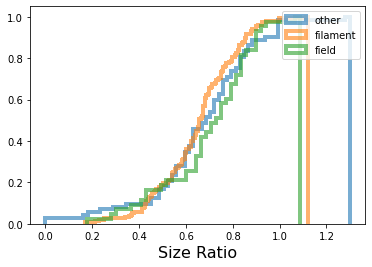

In [57]:
sizeratio = h.halpha['HR17']/h.halpha['R25']
flag1 = h.sampleflag & (h.halpha['R26'] > 0) & (h.hl['t'] > 1)
sizeratio = sizeratio[flag1]

envcat = np.array(h.environment)[flag1]
plt.figure()

for e in enames:
    if e == 'cluster':
        continue
    flag =  (np.array(envcat) == e) 
    plt.hist((sizeratio[flag]),cumulative=True,density=True,label=e,alpha=.6,histtype='step',lw=4,bins=np.sum(flag))
plt.legend()
plt.xlabel('Size Ratio',fontsize=16)

print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'filament']))
print(ks_2samp(sizeratio[envcat == 'field'],sizeratio[envcat == 'other']))
print(ks_2samp(sizeratio[envcat == 'filament'],sizeratio[envcat == 'other']))

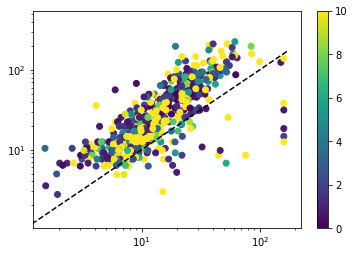

In [58]:
plt.figure()
flag = v.main['HAobsflag']
x = v.nsav0['SERSIC_TH50']
rad = 'GAL_RE'
y = v.halpha[rad]*.4
y = v.halpha['R24']
c = v.env['n5th_2D']
plt.scatter(x[flag],y[flag],c=c[flag],vmin=0,vmax=10)
plt.colorbar()
#plt.axis([0,175,0,175])
xline = np.linspace(0,175,100)
plt.plot(xline,xline,'k--')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

In [9]:
nohaflag = v.paper1['COflag']  & ~v.haobs['HaObsFlag']
print('number of CO sources w/out halpha = ',np.sum(nohaflag))

cohaflag = v.paper1['COflag']  & v.haobs['HaObsFlag']
print('number of CO sources w/halpha = ',np.sum(cohaflag))

number of CO sources w/out halpha =  0
number of CO sources w/halpha =  242


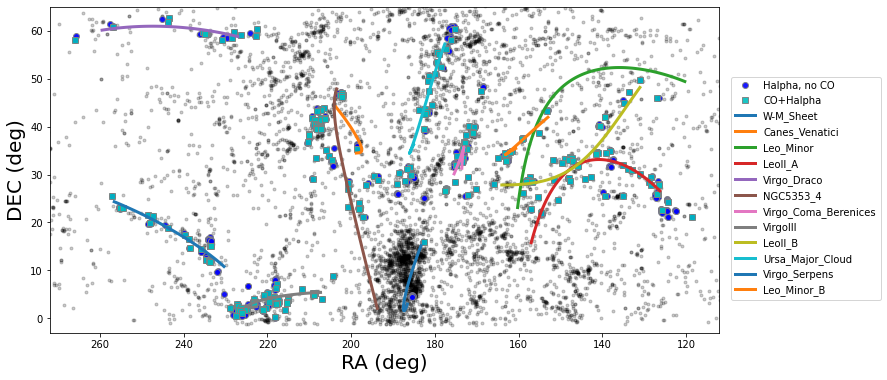

In [12]:
# after rogue INT images have been incorporated
plt.figure(figsize=(12,6))

plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2)

plt.plot(v.main['RA'][v.haobs['HaObsFlag']],v.main['DEC'][v.haobs['HaObsFlag']],'bo',alpha=.9,markersize=6,mec='0.5',label='Halpha, no CO')
plt.plot(v.main['RA'][cohaflag],v.main['DEC'][cohaflag],'cs',alpha=.9,markersize=6,mec='0.5',label='CO+Halpha')
#plt.plot(v.main['RA'][nohaflag],v.main['DEC'][nohaflag],'mD',alpha=.9,markersize=8,mec='0.5',label='CO,no Halpha')
plt.axis([112,272,-3,65])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plot_spines()
plt.legend(bbox_to_anchor=(1.01,.8))
plt.savefig(os.path.join(plotdir,'halpha-positions.png'))

In [50]:
mosaic_centers = [(217.47004045301, 3.4214593967644 ),
(222.72913181465, 2.7345640175569 ),
(223.13184736148, 3.6234238130428 ),
(225.20704416283, 1.9044058457402 ),
(225.73783713095, 0.8310807818246 ),
(226.67637236951, 1.7576779842495 ),
(227.79885197738, 1.7050183823229) ]
morderbyra = [7,6,5,2,4,1,3]
mosaic_names = [f"NGC5846-0{i}" for i in morderbyra]
mosaic_names

['NGC5846-07',
 'NGC5846-06',
 'NGC5846-05',
 'NGC5846-02',
 'NGC5846-04',
 'NGC5846-01',
 'NGC5846-03']

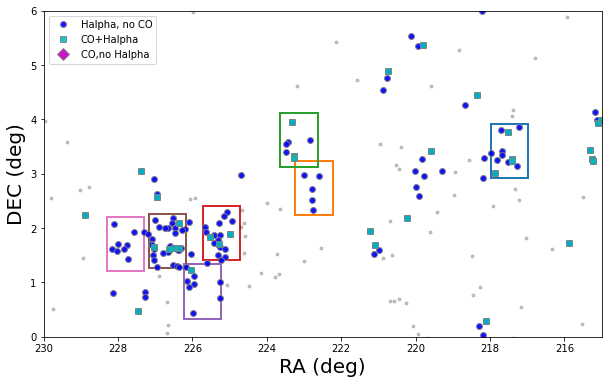

In [51]:
plt.figure(figsize=(10,6))

plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2)
plt.plot(v.main['RA'][v.haobs['HaObsFlag']],v.main['DEC'][v.haobs['HaObsFlag']],'bo',alpha=.9,markersize=6,mec='0.5',label='Halpha, no CO')
plt.plot(v.main['RA'][cohaflag],v.main['DEC'][cohaflag],'cs',alpha=.9,markersize=6,mec='0.5',label='CO+Halpha')
plt.plot(v.main['RA'][nohaflag],v.main['DEC'][nohaflag],'mD',alpha=.9,markersize=8,mec='0.5',label='CO,no Halpha')
plt.axis([112,272,-3,65])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)


for i,m in enumerate(mosaic_names):
    # add a rectangle for Blanco DD time, spring 2021
    rect = Rectangle((mosaic_centers[i][0]-0.5,mosaic_centers[i][1]-0.5), 1, 1, fc="none",ec=mycolors[i],lw=2,label=m)
    plt.gca().add_artist(rect)
  
plt.axis([215,230,0,6])
plt.gca().invert_xaxis()
plt.legend()



In [28]:
mycolors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']


number with halpha = 634


number with CO = 218



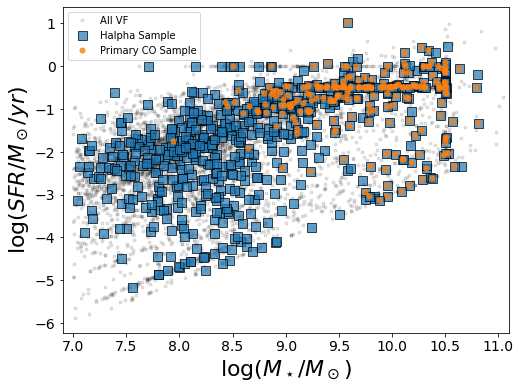

In [62]:
x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']
flag1 = (x > 7)
flag1b = flag1 &  ~v.haobs['HaObsFlag'] & ~v.paper1['COflag']# valid magphys fit
flag2 = flag1 & v.haobs['HaObsFlag']
print()
print(f"number with halpha = {np.sum(flag2)}")
print()
flag3 = flag1 & v.main['COflag']

print()
print(f"number with CO = {np.sum(flag3)}")
print()
plt.figure(figsize=(8,6))
plt.plot(x[flag1b],y[flag1b],'k.',alpha=.1,label='All VF')
plt.plot(x[flag2],y[flag2],'bs',c=mycolors[0],mec='k',alpha=.7,label='Halpha Sample',markersize=9)
plt.plot(x[flag3],y[flag3],'bo',c=mycolors[1],alpha=.8,label='Primary CO Sample',markersize=5)
plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=22)
plt.ylabel('$\log(SFR/M_\odot/yr)$',fontsize=22)
plt.legend()
#plot_BV_MS(plt.gca())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(6.9,11.1)
plt.savefig(plotdir+'sfr-mstar-halpha.png')
plt.savefig(plotdir+'sfr-mstar-halpha.pdf')

401


Text(0, 0.5, 'log SFR Halpha ')

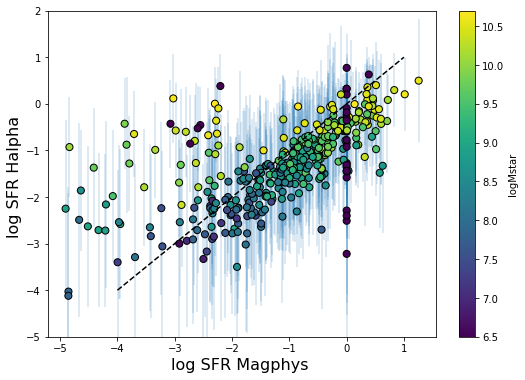

In [65]:
# magphys SFR vs halpha sfr
flag = v.halpha['LOG_SFR_HA_FLAG']
flag = v.halpha['LOG_SFR_HA'] != 0
print(np.sum(flag))
x = v.magphys['logSFR_best']
y = v.halpha['LOG_SFR_HA']
yerr = v.halpha['LOG_SFR_HA_ERR']
plt.figure(figsize=(8,6))
plt.errorbar(x[flag],y[flag],0.5*yerr[flag],fmt='None',alpha=.2)
plt.scatter(x[flag],y[flag],s=50,c=v.magphys['logMstar_med'][flag],vmax=10.7,vmin=6.5,zorder=2,edgecolors='k')
cb = plt.colorbar(fraction=.08,label='logMstar')
xline = np.linspace(-4,1,100)
plt.plot(xline,xline,'k--')
plt.ylim(-5,2)
plt.xlabel("log SFR Magphys ",fontsize=16)
plt.ylabel("log SFR Halpha ",fontsize=16)

Text(0, 0.5, 'logSFR Halpha Error')

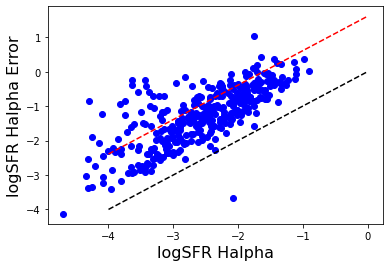

In [59]:
plt.figure()
plt.plot(yerr[flag],y[flag],'bo')
xline = np.linspace(-4,0,100)
plt.plot(xline,xline,'k--',label="1:1")
plt.plot(xline,xline+np.log(5),'r--',label="1:0.5")
plt.xlabel('logSFR Halpha',fontsize=16)
plt.ylabel('logSFR Halpha Error',fontsize=16)

# Image PSF Statistics

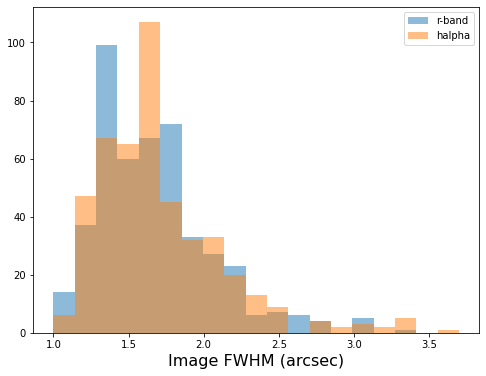

In [60]:
plt.figure(figsize=(8,6))
flag = v.halpha['HAflag']
mybins = np.linspace(1,3.7,20)
plt.hist(v.halpha['R_FWHM'][flag],alpha=.5,label='r-band',bins=mybins)
plt.hist(v.halpha['H_FWHM'][flag],alpha=.5,label='halpha',bins=mybins)
plt.xlabel('Image FWHM (arcsec)',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.legend()

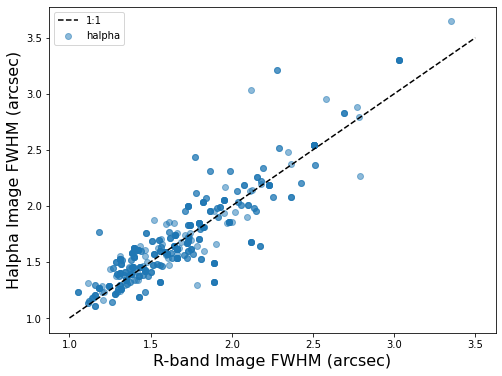

In [66]:
plt.figure(figsize=(8,6))
flag = v.halpha['HAflag']
mybins = np.linspace(1,3.7,20)
plt.scatter(v.halpha['R_FWHM'][flag],v.halpha['H_FWHM'][flag],alpha=.5,label='halpha')
plt.xlabel('R-band Image FWHM (arcsec)',fontsize=16)
plt.ylabel('Halpha Image FWHM (arcsec)',fontsize=16)
xline = np.linspace(1,3.5,100)
plt.plot(xline,xline,'k--',label='1:1')
plt.legend()

# Sizes and  morphology

* Gini vs M20
* C30 Halpha vs C

Text(0, 0.5, 'Gini')

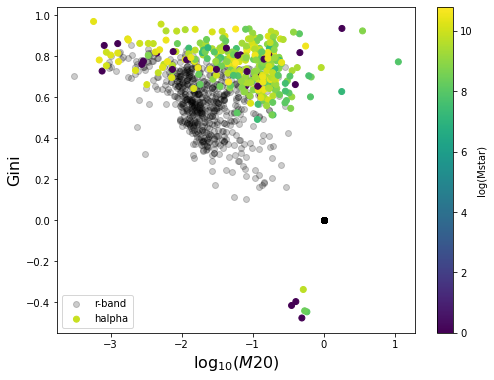

In [77]:
plt.figure(figsize=(8,6))
detect_flag = v.halpha['HF_TOT'] > 0
y = v.halpha['ELLIP_GINI']
x = v.halpha['ELLIP_M20']
plt.scatter(x,y,label='r-band',c='k',alpha=.2)


y = v.halpha['ELLIP_HGINI']
x = v.halpha['ELLIP_HM20']
#color = np.log10(v.halpha['ELLIP_AREA'][detect_flag])
color = v.magphys['logMstar_med'][detect_flag]
color_labels = ['log10(area)','log(Mstar)']
plt.scatter(x[detect_flag],y[detect_flag],c=color,label='halpha')
plt.colorbar(label=color_labels[1])
plt.legend()
plt.xlabel("$\log_{10}(M20)$",fontsize=16)
plt.ylabel("Gini",fontsize=16)

Text(0.5, 0, 'C30')

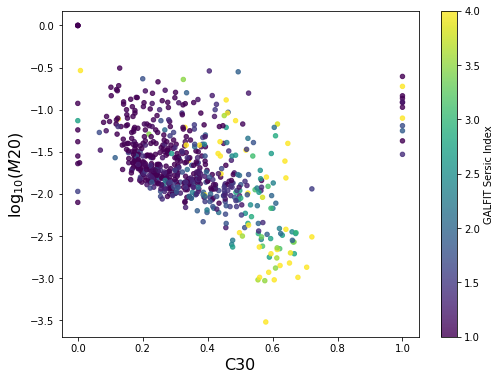

In [71]:
# Rband M20 vs C30

plt.figure(figsize=(8,6))
detect_flag = v.halpha['HAobsflag']
x = v.halpha['C30']
y = v.halpha['ELLIP_M20']
c = v.halpha['GAL_N']
plt.scatter(x[detect_flag],y[detect_flag],label='r-band',s=20,c=c[detect_flag],alpha=.8,vmin=1,vmax=4)
plt.colorbar(label='GALFIT Sersic Index')
plt.ylabel("$\log_{10}(M20)$",fontsize=16)
plt.xlabel("C30",fontsize=16)

(0.0, 1.0)

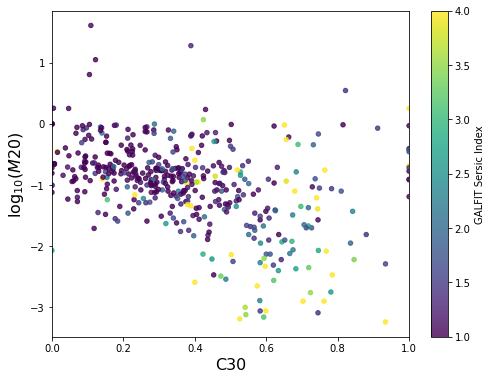

In [75]:
# Rband M20 vs C30

plt.figure(figsize=(8,6))
detect_flag = v.halpha['HAobsflag']
x = v.halpha['HC30']
y = v.halpha['ELLIP_HM20']
c = v.halpha['GAL_N']
plt.scatter(x[detect_flag],y[detect_flag],label='r-band',s=20,c=c[detect_flag],alpha=.8,vmin=1,vmax=4)
plt.colorbar(label='GALFIT Sersic Index')
plt.ylabel("$\log_{10}(M20)$",fontsize=16)
plt.xlabel("C30",fontsize=16)
plt.xlim(0,1.)

# Compare SFR magphys and halpha

In [ ]:
x = v.magphys['log']

In [8]:
%run ~/github/havirgo/python/ha-paper1.py

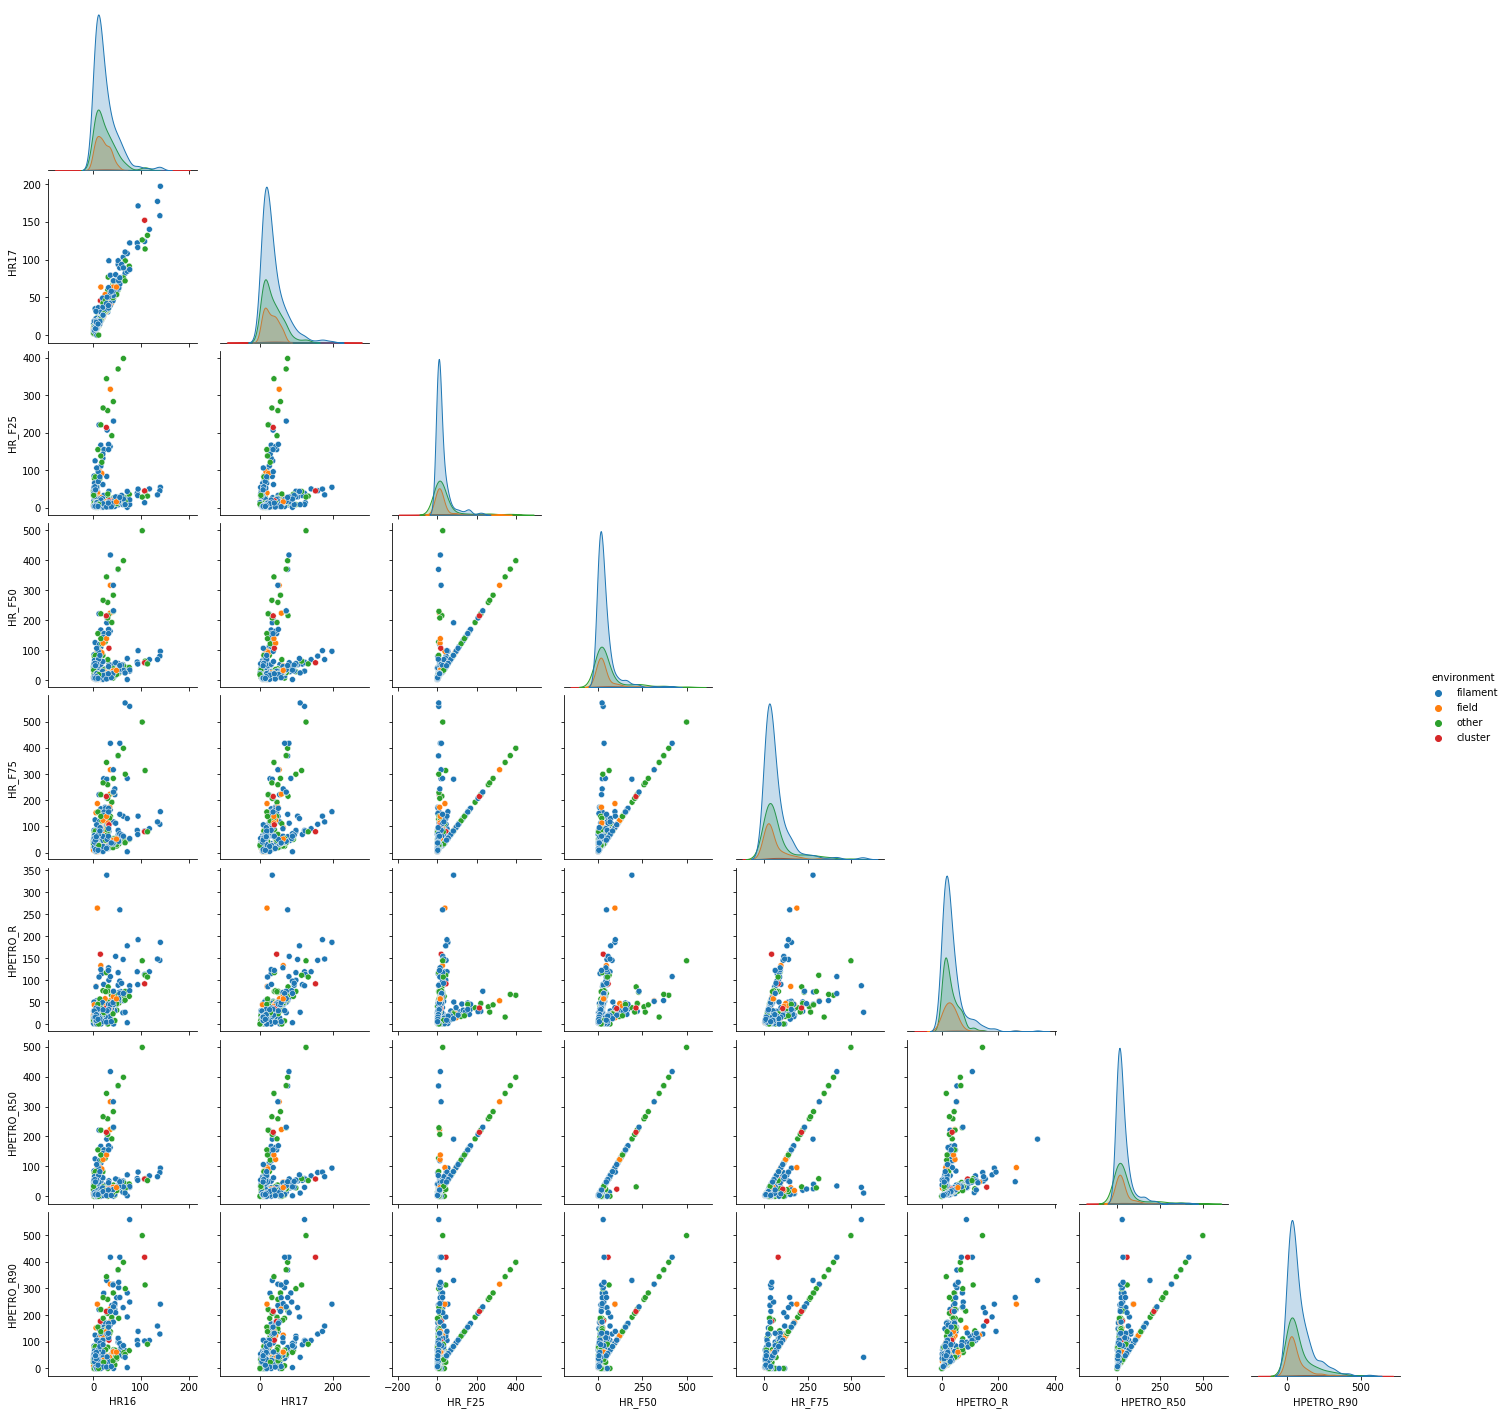

In [9]:
h.plot_ha_sizes()

In [100]:
pip install seaborn --upgrade

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


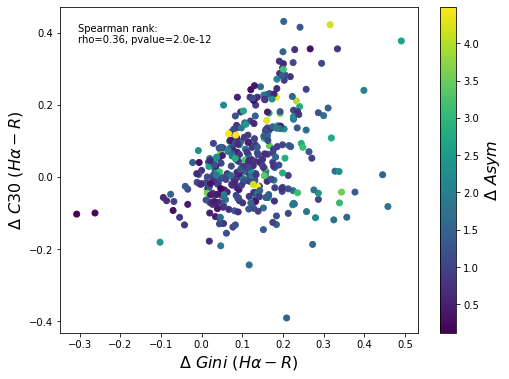

In [23]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_c30_gini()

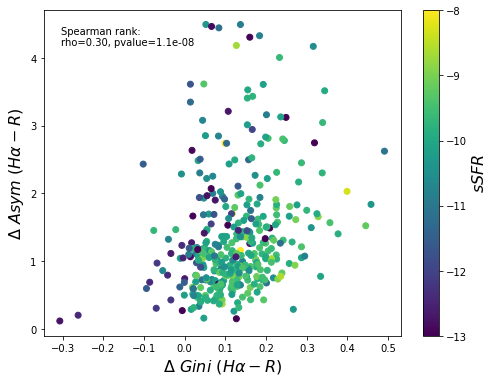

In [20]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_delta_asym_gini()

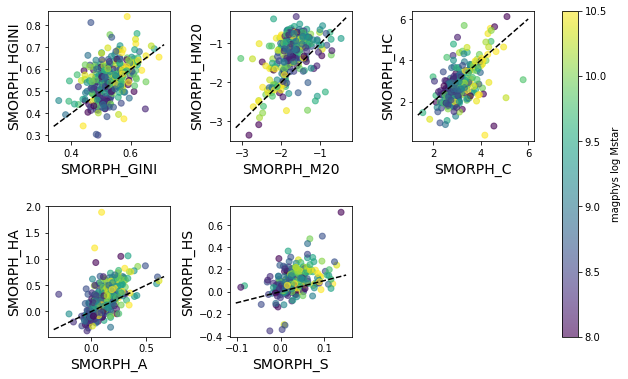

In [27]:
%run ~/github/havirgo/python/ha-paper1.py
h.plot_smorph_ha_r()